### Customer Churn with Logistic Regression

Aim: To create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

In [2]:
import pandas as pd
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as opt 
from sklearn import preprocessing 


# metadata
A telecommunications data for predicting customer churn. This is a historical customer data where each row represents one customer. This analysis is to predict the customers who will stay with the company. 
This data set provides info to help you predict behavior to retain customers.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone,
 multiple lines, 
 internet, 
 online security, 
 online backup, 
 device protection, 
 tech support, 
 and streaming TV and movies
- Customer account information – 
how long they’ve been a customer, 
contract, payment method, 
paperless billing, 
monthly charges, 
and total charges
- Demographic info about customers – 
gender, 
age range, 
and if they have partners and dependents

In [6]:
# The churn data is an hypothetical data that concerns a telecommunication company.
# The data has been extracted from IBM Obj Storage


data = pd.read_csv(r"C:\Users\USER-PC\OneDrive\Data Analytics\Data Science_Machine Learning\Machine Learning (1)\ChurnData.csv")
data.head()

,Unnamed: 0,tenure,age,address,income,ed,employ,equip,callcard,wireless,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data Preprocessing and Features selection

In [7]:
churn_df = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

C:\Users\USER-PC\AppData\Local\Temp/ipykernel_26056/2141169409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [8]:
churn_df.info()
churn_df.columns    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 15.0 KB


Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [17]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [12]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

 The data is numeric, no need for encoding (converting cat to num)
 lets normalise the data

In [20]:
# The data is numeric, no need for encoding (converting cat to num)
# lets normalise the data

from sklearn.preprocessing import StandardScaler

# Standardize X
scalerX = StandardScaler()
scalerX.fit(X)

X_scaled = scalerX.transform(X) 
X = X_scaled

#print(X_scaled[0:5])
print(X[0:5])



[[-1.13518441 -0.62595491 -0.4588971   0.4751423   1.6961288  -0.58477841
  -0.85972695]
 [-0.11604313 -0.62595491  0.03454064 -0.32886061 -0.6433592  -1.14437497
  -0.85972695]
 [-0.57928917 -0.85594447 -0.261522   -0.35227817 -1.42318853 -0.92053635
  -0.85972695]
 [ 0.11557989 -0.47262854 -0.65627219  0.00679109 -0.6433592  -0.02518185
   1.16316   ]
 [-1.32048283 -0.47262854  0.23191574  0.03801451 -0.6433592   0.53441472
  -0.85972695]]


Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


Modeling Log Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_reg = LogisticRegression(solver='liblinear', max_iter=1000, C=0.01) 

log_reg.fit(X_train, y_train)
log_reg


LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')

Using Test set to predict the model

In [34]:
ypred = log_reg.predict(X_test)
ypred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [39]:
print("Training accuracy: ", log_reg.score(X_train, y_train))


Training accuracy:  0.74375


Score Evaluation

In [43]:
# Using Jacard index

from sklearn.metrics import jaccard_score

print(jaccard_score (ypred, y_test))


0.5


In [45]:
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, ypred)

In [ ]:
# Confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools

print(confusion_matrix(y_test, yhat, labels=[1,0]))

In [46]:
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = log_reg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Accuracy
accuracy = (cm[0,0] + cm[1,1]) / len(y_test)
print('Accuracy: ', accuracy)


[[26  5]
 [ 2  7]]
Accuracy:  0.825


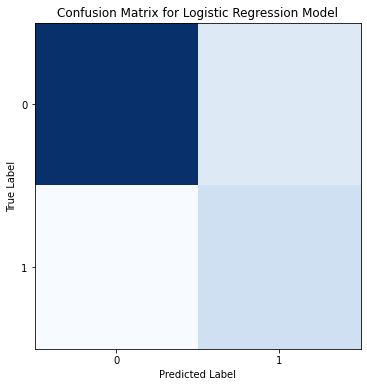

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix and save figure
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix for Logistic Regression Model')
plt.imshow(cm, cmap='Blues')

plt.xticks([0,1], [0,1]) 
plt.yticks([0,1], [0,1])

plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.savefig('confusion_matrix.png')


In [52]:
from sklearn.metrics import classification_report

# model fitting and prediction code

print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.58      0.78      0.67         9

    accuracy                           0.82        40
   macro avg       0.76      0.81      0.77        40
weighted avg       0.85      0.82      0.83        40



__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the f1-score for both labels

 Log loss
 Measures the performance of a classifier where the predicted output is a probability value btw 0 & 1

In [57]:
from sklearn.metrics import log_loss

# Get probability predictions 
y_pred_prob = log_reg.predict_proba(X_test) 

log_loss(y_test, y_pred_prob[:,1])


0.5629381654151255